## Are Premier League Clubs Spending their Money Wisely? An Analysis

Transfers are the main component of professional soccer clubs building and improving their teams. A transfer is when a player is under contract for one club but moves to another. The leading way clubs transfer these players is by exchanging the player for a large sum of money that is agreed upon between the two clubs. This money comes from the club's investors, sponsors, and revenue. Because of the importance of money in soccer, fans believe that the more money spent the better the results for their team will be. Is this true? Who are the teams that are spending their money the best? Who are the teams that are spending their money the worst? Is the difference in transfer spending ruining the competitiveness of the league? These are the questions I want to explore in my analysis.

### Data

To gather the data on the results of each team in the premier league to see how they performed each year, I found and downloaded a dataset that contains all the results and final positions of all the teams in the league for that given year. This dataset contains results for every team from the 2010-2011 season all the way to the 2020-2021 season. The code to read the CSV file and to display the table is shown below.

In [ ]:
import os
import folium
import requests
import pandas
import numpy

epl_standings = pandas.read_csv("notebooks/Final/EPL_Standings.csv")

epl_standings

,Season,Pos,Club,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2010-11,1,Manchester United,38,23,11,4,78,37,41,80,Qualification for the Champions League group s...
1,2010-11,2,Chelsea,38,21,8,9,69,33,36,71,Qualification for the Champions League group s...
2,2010-11,3,Manchester City,38,21,8,9,60,33,27,71,Qualification for the Champions League group s...
3,2010-11,4,Arsenal,38,19,11,8,72,43,29,68,Qualification for the Champions League play-of...
4,2010-11,5,Tottenham Hotspur,38,16,14,8,55,46,9,62,Qualification for the Europa League play-off r...
...,...,...,...,...,...,...,...,...,...,...,...,...
215,2020-21,16,Brighton & Hove Albion,38,9,14,15,40,46,-6,41,Not Applicable
216,2020-21,17,Burnley,38,10,9,19,33,55,-22,39,Not Applicable
217,2020-21,18,Fulham,38,5,13,20,27,53,-26,28,Relegation to the EFL Championship
218,2020-21,19,West Bromwich Albion,38,5,11,22,35,76,-41,26,Relegation to the EFL Championship


The other data we want to analyze and manipulate is the transfer data for all the clubs in the premier league. I downloaded data from https://www.transfermarkt.us/ which is a German-based website that has all the information available to the public in their database about soccer transfers. The data I downloaded was the net spending of each club in the past ten years. Net spend is the difference between the money a team made by selling players and the money a team spent by buying players. A positive net spend means a team made a profit by spending less than they sold and a negative net spend means a team spent more than they sold. Here is the code to get the data. 

In [319]:
transfer_table = pandas.read_csv("notebooks/Final/Premier_league_transfer.csv")

transfer_table

,Club,2021-22,2020-21,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,Total
0,Arsenal,-136.02,-66.85,-107.15,-71.05,9.15,-102.69,-24.00,-91.18,-37.10,9.85,-617.04
1,Newcastle United,-131.50,-38.73,-37.26,-8.70,-25.28,36.63,-102.28,-21.15,22.07,-17.17,-323.36
2,Manchester United,-109.30,-64.30,-153.62,-52.15,-152.90,-137.75,-55.33,-148.65,-75.33,-66.80,-1016.13
3,Crystal Palace,-85.62,-2.40,47.78,-11.50,-45.95,-51.00,-23.40,-28.35,-33.00,14.67,-218.77
4,West Ham United,-70.27,-9.29,-64.32,-87.14,12.22,-42.50,-34.19,-30.75,-23.47,-18.85,-368.54
...,...,...,...,...,...,...,...,...,...,...,...,...
15,Aston Villa,-2.82,-98.58,-156.50,-2.95,15.03,-39.70,-1.85,-12.14,-11.74,-24.63,-335.88
16,Chelsea,1.95,-189.80,112.27,-125.55,-65.90,-23.90,-9.01,5.11,-52.42,-84.25,-431.50
17,Brighton & Hove Albion,4.80,-7.90,-59.90,-73.50,-66.10,-8.75,-13.47,9.42,3.20,-0.67,-212.88
18,Everton,6.50,-68.95,-33.20,-71.15,-76.82,-25.20,-37.90,-38.26,14.30,-2.90,-333.58


## Cleaning and Manipulating the Data

Here I wanted to merge the two tables and display them, but there are some logistical things that must be taken care of first. I had to delete the 2021-2022 season as it is not finished yet and the transfer data on it was not fully up to date. Then I had to delete the club Brentford from the transfer table as the 2021-2022 season was the first season they were in the premier league, so there is no data for their results in the premier league for the last 10 seasons.  I then deleted information that I don’t believe is relevant to the analysis I will be doing. I deleted games played (GP) as it doesn’t measure performance at all. I also deleted wins, losses, and draws because points encompass all 3 of these (W= 3 points, D= 1 point, L= 0 points). I also deleted the qualification column as it is just a description and has no numerical values.

Then I took the Net Spend for each club during each season from the transfer table and added it to the standings table which will allow me to provide a comprehensive performance review for each club during each season. The code for all of this is below.

In [320]:
ntransfer_table = transfer_table.drop(columns="2021-22") #Delete 21-22 season
ntransfer_table= ntransfer_table.drop(10) #Delete Brentford
clublist= ntransfer_table['Club'].tolist()

nepl_standings = epl_standings.drop(range(0,40)) ##Delete the 2010-11 and 2011-12 seasons

nepl_standings = nepl_standings[nepl_standings['Club'].isin(clublist)] #Take out clubs that aren't in PL

nepl_standings = nepl_standings.drop(columns="W") #Delete Information not needed for analysis
nepl_standings = nepl_standings.drop(columns="D")
nepl_standings = nepl_standings.drop(columns="L")
nepl_standings = nepl_standings.drop(columns="Qualification or relegation")
nepl_standings = nepl_standings.drop(columns="Pld")

nepl_standings.loc[nepl_standings['Club'] == "Arsenal", 'Club_num'] = 0##Create this row to check seasons will delete later
nepl_standings.loc[nepl_standings['Club'] == "Newcastle United", 'Club_num'] = 1
nepl_standings.loc[nepl_standings['Club'] == "Manchester United", 'Club_num'] = 2
nepl_standings.loc[nepl_standings['Club'] == "Crystal Palace", 'Club_num'] = 3
nepl_standings.loc[nepl_standings['Club'] == "West Ham United", 'Club_num'] = 4
nepl_standings.loc[nepl_standings['Club'] == "Leicester City", 'Club_num'] = 5
nepl_standings.loc[nepl_standings['Club'] == "Tottenham Hotspur", 'Club_num'] = 6
nepl_standings.loc[nepl_standings['Club'] == "Leeds United", 'Club_num'] = 7
nepl_standings.loc[nepl_standings['Club'] == "Liverpool", 'Club_num'] = 8
nepl_standings.loc[nepl_standings['Club'] == "Manchester City", 'Club_num'] = 9
nepl_standings.loc[nepl_standings['Club'] == "Watford", 'Club_num'] = 11
nepl_standings.loc[nepl_standings['Club'] == "Norwich City", 'Club_num'] = 12
nepl_standings.loc[nepl_standings['Club'] == "Wolverhampton Wanderers", 'Club_num'] = 13
nepl_standings.loc[nepl_standings['Club'] == "Burnley", 'Club_num'] = 14
nepl_standings.loc[nepl_standings['Club'] == "Aston Villa", 'Club_num'] = 15
nepl_standings.loc[nepl_standings['Club'] == "Chelsea", 'Club_num'] = 16
nepl_standings.loc[nepl_standings['Club'] == "Brighton & Hove Albion", 'Club_num'] = 17
nepl_standings.loc[nepl_standings['Club'] == "Everton", 'Club_num'] = 18
nepl_standings.loc[nepl_standings['Club'] == "Southampton", 'Club_num'] = 18

nepl_standings['Club_num'] = nepl_standings['Club_num'].fillna(0).astype(int)
df= pandas.DataFrame()

for i, val in nepl_standings.iterrows():  ##adding the netspend to the dataframe
    seas= nepl_standings.at[i,'Season']
    cid = (nepl_standings.at[i,'Club_num'])
    df.at[i,'Net_Spend'] = ntransfer_table.iloc[cid][seas]

result = pandas.concat([nepl_standings, df], axis=1, join='inner')
nr = result.drop(columns= 'Club_num')
nr

,Season,Pos,Club,GF,GA,GD,Pts,Net_Spend
40,2012-13,1,Manchester United,86,43,43,89,-66.80
41,2012-13,2,Manchester City,66,34,32,78,-17.65
42,2012-13,3,Chelsea,75,39,36,75,-0.67
43,2012-13,4,Arsenal,72,37,35,73,9.85
44,2012-13,5,Tottenham Hotspur,66,46,20,72,-0.47
...,...,...,...,...,...,...,...,...
212,2020-21,13,Wolverhampton Wanderers,36,52,-16,45,1.20
213,2020-21,14,Crystal Palace,41,66,-25,44,-2.40
214,2020-21,15,Southampton,47,68,-21,43,-11.00
215,2020-21,16,Brighton & Hove Albion,40,46,-6,41,-68.95


Then I took the average position over the last ten years and added it to the transfer table, so you can see each club's average position over the last ten years. I also got the average pts, goals for, and goals against in the last 10 years. This gives a very sound overall idea of how a team performed in the last decade and will allow me to do in depth analysis later. 

I then took got data for the last five years, so I extracted the average position, points, goals for, goals against, and total net spend over the last five years. This is an extremely important delineation in time because in 2016 the premier league signed a new television deal which saw revenue for the league and its clubs' skyrocket as you can see here https://www.statista.com/statistics/385002/premier-league-tv-rights-revenue/. So measuring the last five years will give a more accurate reading of how clubs are spending their money in the modern-day. 

In [321]:
N = 4
# Drop first N columns of dataframe
ntr= ntransfer_table
for i, val in ntransfer_table.iterrows():
    ntr.at[i,'Total Last 5']= (ntransfer_table.at[i, '2016-17'] + ntransfer_table.at[i, '2017-18'] + ntransfer_table.at[i, '2018-19'] + ntransfer_table.at[i, '2019-20'] + ntransfer_table.at[i, '2020-21'])
    
for i, val in ntransfer_table.iterrows():
    club= ntransfer_table.at[i, 'Club']
    temp= nr[nr['Club']== club]
    ntr.at[i, 'Avg. Pos. Last 10'] = temp['Pos'].mean() ##Average position last 10 years
    ntr.at[i, 'Avg. Pts. Last 10'] = temp['Pts'].mean()
    ntr.at[i, 'Avg. GF Last 10'] = temp['GF'].mean()
    ntr.at[i, 'Avg. GA Last 10'] = temp['GA'].mean()
    temp = temp[temp.Season != '2012-13']
    temp = temp[temp.Season != '2013-14']
    temp = temp[temp.Season != '2014-15']
    temp = temp[temp.Season != '2015-16']    
    ntr.at[i, 'Avg. Pos. Last 5'] = temp['Pos'].mean() ##Average position last 5 years
    ntr.at[i, 'Avg. Pts. Last 5'] = temp['Pts'].mean()
    ntr.at[i, 'Avg. GF Last 5'] = temp['GF'].mean()
    ntr.at[i, 'Avg. GA Last 5'] = temp['GA'].mean()
    
pandas.set_option("display.max_rows", 10, "display.max_columns", None)
        
ntr['Total abs 10']= ntr['Total']*-1
ntr['Total abs 5']= ntr['Total Last 5']*-1
ntr

,Club,2020-21,2019-20,2018-19,2017-18,2016-17,2015-16,2014-15,2013-14,2012-13,Total,Total Last 5,Avg. Pos. Last 10,Avg. Pts. Last 10,Avg. GF Last 10,Avg. GA Last 10,Avg. Pos. Last 5,Avg. Pts. Last 5,Avg. GF Last 5,Avg. GA Last 5,Total abs 10,Total abs 5
0,Arsenal,-66.85,-107.15,-71.05,9.15,-102.69,-24.00,-91.18,-37.10,9.85,-617.04,-338.59,5.000000,69.222222,67.888889,42.555556,6.40,65.0,67.00,46.60,617.04,338.59
1,Newcastle United,-38.73,-37.26,-8.70,-25.28,36.63,-102.28,-21.15,22.07,-17.17,-323.36,-73.34,13.375000,43.000000,42.125000,58.750000,12.00,44.5,41.25,53.75,323.36,73.34
2,Manchester United,-64.30,-153.62,-52.15,-152.90,-137.75,-55.33,-148.65,-75.33,-66.80,-1016.13,-560.72,4.000000,71.666667,65.222222,38.777778,3.80,71.2,65.20,38.20,1016.13,560.72
3,Crystal Palace,-2.40,47.78,-11.50,-45.95,-51.00,-23.40,-28.35,-33.00,14.67,-218.77,-63.07,12.625000,44.500000,42.125000,54.625000,13.00,44.2,43.60,57.40,218.77,63.07
4,West Ham United,-9.29,-64.32,-87.14,12.22,-42.50,-34.19,-30.75,-23.47,-18.85,-368.54,-191.03,10.888889,48.666667,50.222222,55.333333,11.20,48.6,51.60,59.20,368.54,191.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Aston Villa,-98.58,-156.50,-2.95,15.03,-39.70,-1.85,-12.14,-11.74,-24.63,-335.88,-282.70,15.833333,37.333333,40.000000,62.666667,14.00,45.0,48.00,56.50,335.88,282.70
16,Chelsea,-189.80,112.27,-125.55,-65.90,-23.90,-9.01,5.11,-52.42,-84.25,-431.50,-292.88,3.777778,73.555556,68.333333,39.000000,3.40,73.6,67.40,40.00,431.50,292.88
17,Brighton & Hove Albion,-7.90,-59.90,-73.50,-66.10,-8.75,-13.47,9.42,3.20,-0.67,-212.88,-216.15,15.750000,39.500000,37.000000,53.500000,15.75,39.5,37.00,53.50,212.88,216.15
18,Everton,-68.95,-33.20,-71.15,-76.82,-25.20,-37.90,-38.26,14.30,-2.90,-333.58,-275.32,8.666667,55.666667,52.666667,48.444444,9.00,54.4,50.20,50.40,333.58,275.32


Next, I wanted to combine the data into different statistics that can properly answer the questions I want to discover. I made four new measures and calculated them in a new table for each club in the premier league. I did this for the last 10 years and the last 5 years to get a diverse measurement. Below I will briefly explain how I got each statistic and their significance.

PPMS stands for position per money spent and it takes the average position per season in the given time period and divides it by the total money spent during that same time period. Then I took the absolute value. A greater value means that the club has performed well compared to the money they have spent.

GPMS stands for goals per money spent and it takes the average goals scored per season in the given time period and divides it by the total money spent during that same time period. Then I took the absolute value. A greater value means that the club’s offense has performed well compared to the money they have spent.

GAPMS stands for goals per money spent and it takes the average goals allowed scored per season in the given time period and divides it by the total money spent during that same time period. Then I took the absolute value. A greater value means that the club’s defense has performed well compared to the money they have spent.

PtPMS stands for points per money spent and it takes the average points per season in the given time period and divides it by the total money spent during that same time period. Then I took the absolute value. A greater value means that the club has performed well compared to the money they have spent. This is measures something different from the PPMS because some years teams will score more points however their position will be the same or lower because their position is dependent on how other teams perform in that given year.

The 5 and the 10 in each of the statistics represent the years that are being measured, the 5 is the last 5 years and the 10 is the last 10 years. 

Now here is the code I used to gather this information and organize it.

In [333]:
analysis= pandas.DataFrame()
analysis['Club']= ntr['Club']
analysis['PPMS5']= (ntr['Avg. Pos. Last 5']/ntr['Total Last 5'])
analysis['PPMS5']=analysis['PPMS5'].abs()
analysis['PPMS10']= (ntr['Avg. Pos. Last 10']/ntr['Total'])
analysis['PPMS10']=analysis['PPMS10'].abs()
analysis['GPMS5'] =(ntr['Avg. GF Last 5']/ntr['Total Last 5'])
analysis['GPMS5']=analysis['GPMS5'].abs()
analysis['GPMS10'] =(ntr['Avg. GF Last 10']/ntr['Total'])
analysis['GPMS10']=analysis['GPMS10'].abs()
analysis['GAPMS5'] =(ntr['Avg. GA Last 5']/ntr['Total Last 5'])
analysis['GAPMS5']=analysis['GAPMS5'].abs()
analysis['GAPMS10'] =(ntr['Avg. GA Last 10']/ntr['Total'])
analysis['GAPMS10']=analysis['GAPMS10'].abs()
analysis['PtPMS5'] =(ntr['Avg. Pts. Last 5']/ntr['Total Last 5'])
analysis['PtPMS5']=analysis['PtPMS5'].abs()
analysis['PtPMS10'] =(ntr['Avg. Pts. Last 10']/ntr['Total'])
analysis['PtPMS10']=analysis['PtPMS10'].abs()
analysis = analysis[analysis.Club != 'Watford']
pandas.set_option("display.max_rows", None, "display.max_columns", None)

analysis

,Club,PPMS5,PPMS10,GPMS5,GPMS10,GAPMS5,GAPMS10,PtPMS5,PtPMS10
0,Arsenal,0.018902,0.008103,0.197879,0.110023,0.137630,0.068967,0.191973,0.112184
1,Newcastle United,0.163621,0.041363,0.562449,0.130273,0.732888,0.181686,0.606763,0.132979
2,Manchester United,0.006777,0.003937,0.116279,0.064187,0.068127,0.038162,0.126980,0.070529
3,Crystal Palace,0.206120,0.057709,0.691295,0.192554,0.910100,0.249691,0.700809,0.203410
4,West Ham United,0.058630,0.029546,0.270115,0.136273,0.309899,0.150142,0.254410,0.132053
5,Leicester City,0.079976,0.034461,0.579826,0.253133,0.523843,0.221178,0.541837,0.246241
6,Tottenham Hotspur,0.019405,0.017439,0.314002,0.256904,0.170232,0.160778,0.313120,0.267963
7,Leeds United,0.097371,0.060419,0.670778,0.416219,0.584226,0.362513,0.638321,0.396079
8,Liverpool,0.017934,0.010610,0.517517,0.198141,0.226734,0.105522,0.532889,0.195847
9,Manchester City,0.002619,0.001914,0.152547,0.088705,0.051067,0.034446,0.145018,0.084653


### Data Visualization and Analysis

The first question I wanted to explore was does spending more money make premier league clubs perform better? To visualize this component I created four boxplots that can represent performance and compare it to the money being spent. The first two plots show the Average Position of Premier Clubs compared to the Money Spent by each of these clubs in the last 5 and 10 years. The second group of two plots show the Average Points of Premier Clubs accrued compared to the Money Spent by each of these clubs in the last 5 and 10 years. In both this scenarios performance is compared to money spent. The code and boxplots are shown below.

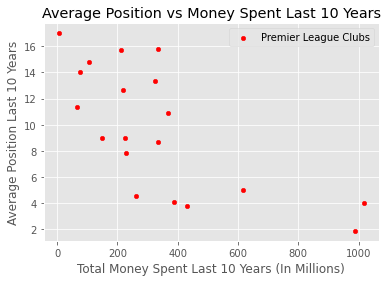

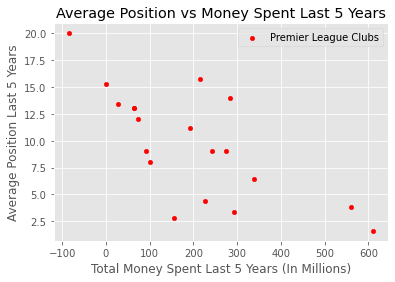

In [344]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn
matplotlib.style.use('ggplot')

ax = ntr.plot('Total abs 10', 'Avg. Pos. Last 10', kind='scatter', c='r', label='Premier League Clubs')
plt.title('Average Position vs Money Spent Last 10 Years')
plt.xlabel('Total Money Spent Last 10 Years (In Millions)')
plt.ylabel('Average Position Last 10 Years')
plt.show()
bx = ntr.plot('Total abs 5', 'Avg. Pos. Last 5', kind='scatter', c='r', label='Premier League Clubs')
plt.title('Average Position vs Money Spent Last 5 Years')
plt.xlabel('Total Money Spent Last 5 Years (In Millions)')
plt.ylabel('Average Position Last 5 Years')
plt.show()

The first two boxplots shows that the more money teams spent the lower their position is. The lower the position the stronger the performance as the position is a ranking compared to other clubs (meaning 1 is first place and 2 is second place). This plot shows that the more money premier league clubs spend the lower their position which means the better their performance is. This is true in the last 10 years and the last 5 years. 

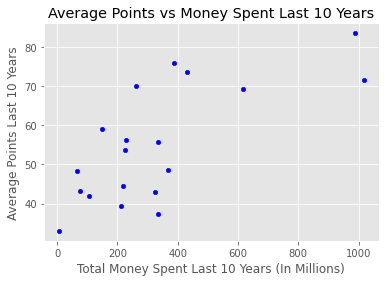

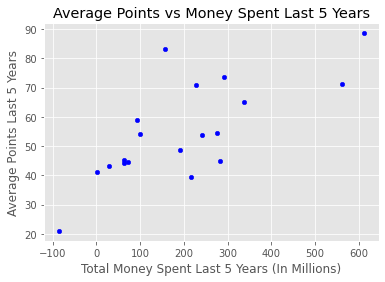

In [314]:
cx = ntr.plot('Total abs 10', 'Avg. Pts. Last 10', kind='scatter', c='b')
plt.title('Average Points vs Money Spent Last 10 Years')
plt.xlabel('Total Money Spent Last 10 Years (In Millions)')
plt.ylabel('Average Points Last 10 Years')
plt.show()
dx = ntr.plot('Total abs 5', 'Avg. Pts. Last 5', kind='scatter', c='b')
plt.title('Average Points vs Money Spent Last 5 Years')
plt.xlabel('Total Money Spent Last 5 Years (In Millions)')
plt.ylabel('Average Points Last 5 Years')
plt.show()

The second group of two boxplots shows a similar analysis. These two plots show that the more money premier league teams spend the more points they accrue through the season which means their performance gets better as the team spends more money. This is also true throughout the last 5 and 10 years.

I created these next two boxplots to explore if spending more money affects improves the attack (or offense) or the defense of a team more. I decided to explore this because attackers are known to be more expensive than defenders and a lot of people believe a defense must be grown but an attack can be bought.

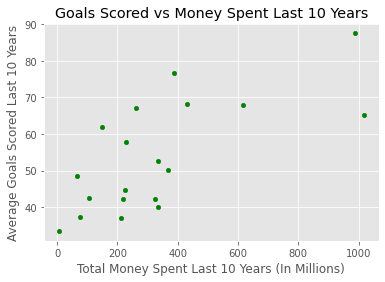

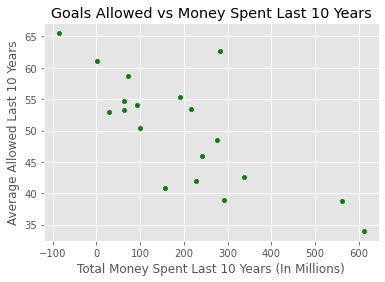

In [345]:
ex = ntr.plot('Total abs 10', 'Avg. GF Last 10', kind='scatter', c='g')
plt.title('Goals Scored vs Money Spent Last 10 Years')
plt.xlabel('Total Money Spent Last 10 Years (In Millions)')
plt.ylabel('Average Goals Scored Last 10 Years')
plt.show()
fx = ntr.plot('Total abs 5', 'Avg. GA Last 10', kind='scatter', c='g')
plt.title('Goals Allowed vs Money Spent Last 10 Years')
plt.xlabel('Total Money Spent Last 10 Years (In Millions)')
plt.ylabel('Average Allowed Last 10 Years')
plt.show()

The two boxplots do support the conclusions made from the previous box plots as in both situations the more money teams spend the better their performances were, they let up fewer goals and score more goals. However, the assumption that offense is more greatly affected compared to defense by money is false as shown by the boxplots. The relationship between goals allowed and money spent is more linear than the relationship between goals scored and money spent. Money is actually a bigger factor in building a team’s defense than their attack which means other factors like coaching and tactics most likely have a bigger effect on a team's offense. 

Lastly, I wanted to analyze which teams were spending their money wisely. To do this I decided to plot bar graphs that will show how each team performed in a certain metric, the metrics I created. The first plot graphs the points per money spent for each team the higher the metric the better the team performed for the money they spent. The second plot graphs the position per money spent and the third plot graphs the goals per money spent. In each plot the higher the metric the better the team performed for the money they spent.

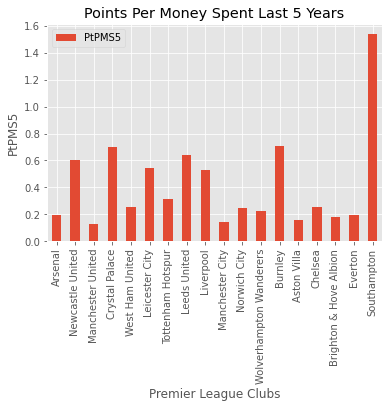

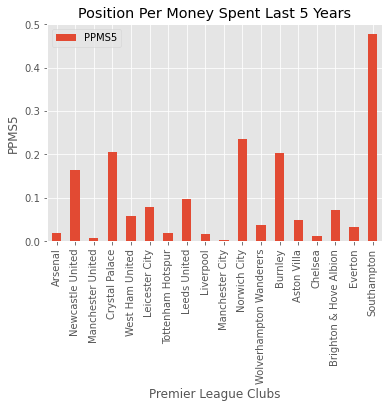

In [338]:
analysis.plot(x='Club', y='PtPMS5', kind='bar') 
plt.title('Points Per Money Spent Last 5 Years')
plt.xlabel('Premier League Clubs')
plt.ylabel('PtPMS5')
plt.show()

analysis.plot(x='Club', y='PPMS5', kind='bar') 
plt.title('Position Per Money Spent Last 5 Years')
plt.xlabel('Premier League Clubs')
plt.ylabel('PPMS5')
plt.show()

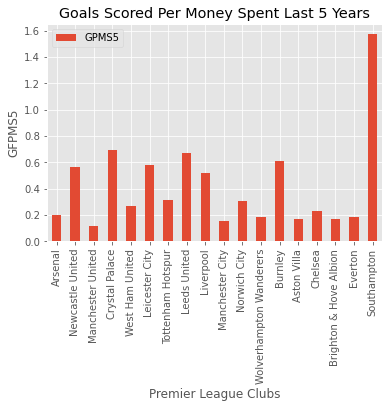

In [343]:
analysis.plot(x='Club', y='GPMS5', kind='bar') 
plt.title('Goals Scored Per Money Spent Last 5 Years')
plt.xlabel('Premier League Clubs')
plt.ylabel('GFPMS5')
plt.show()

These bar graphs show the teams that have spent their money wisely in the premier league. Teams like Southampton, Burnley, Crystal Palace, and Leeds United perform well in my calculations. All of these teams mentioned don’t frivolously spend money as they aren’t raking in money from revenue like other clubs. However, they continue to perform well in the premier league and these plots show that they perform well compared to the money they spend. 

The top six clubs, the six biggest clubs in the league, do not perform as well in these plots. The metrics I calculated do not favor these teams. Even though they are the teams with the overall best performances the calculations say that the astronomical amounts of money they spend are not proportional to how they are performing. The bar plots are showing that these teams could spend their money more wisely and still perform at the top of the tables, but as of now, they are overspending.

However, out of the top six, the team that spends their money the wisest is Liverpool. Liverpool is an analytically driven team as you can read more about here, https://www.nytimes.com/2019/05/22/magazine/soccer-data-liverpool.html. Using these analytics Liverpool spends less money on overpriced players and because of this, they perform well compared to their money spent. They spend their money efficiently and it has allowed them to keep more money and still perform as a top team in the league.


### Conclusion

After analyzing the premier league clubs' spending and performances, many things can be concluded. First of all spending more money does correlate to better performances and this makes perfect sense because these teams are able to buy more valuable players which tend to be the better players. However, just because these teams spend a lot of money does not mean these teams are spending their money efficiently. As seen in the calculations a lot of the teams that spend their money efficiently are not the richest clubs in the league. Throughout my analysis, I highlighted the teams that spent their money the wisest. 

As a lot of fans and soccer enthusiasts know, money has become a key factor in building a competitive team. Most people believe that the richest clubs have an unfair competitive advantage and even though they perform better on average, there is still hope for the rest of the clubs. Clubs like Liverpool who spend their money extremely efficiently can churn out results on par with the richest clubs in the world even though they don’t spend as much money. At the end of the day how you spend your money is more important than how much money you spend.
